# Стажировка | Разработка нейросетевой рекомендательной системы для пациентов с диагнозом рака легких

Учебная программа

https://lk.neural-university.ru/learning-program-v2/362796

Рабочий GitHub

https://github.com/terrainternship/NMIC_n/tree/main

ТЗ:

https://docs.google.com/document/d/1nilWRcc5AQhp6XOg_SQ2jVIogJUmFriZcIh4j0-J1_c/edit?usp=sharing

Датасет:

https://docs.google.com/spreadsheets/d/1SH2MlcUbLQ7ygXqjv-1bCpZf1KIGa-hx/edit?usp=sharing&ouid=100875896065028420151&rtpof=true&sd=true

https://docs.google.com/spreadsheets/d/1GxiYANrHyqFB9L6KkxypmS5KhbZen3Tm/edit?usp=sharing&ouid=100875896065028420151&rtpof=true&sd=true

Срок окончания проекта - 09.01.2024г.

Чат: **НМИЦ_стажировка (новички) 01.09 | Колбенев Василий**

In [1]:
import gdown                      # Скачивание файлов
import pandas as pd               # Пандас для таблиц

import matplotlib.pyplot as plt   # matplotlib для графиков
import seaborn as sns             # seaborn для графиков

import numpy as np                # Нампай для массивов
from google.colab import files    # Загрузка файлов

# Команда для отображения графики в ячейках среды Google Colaboratory
%matplotlib inline
import math
import re
import os.path

from sklearn.preprocessing import LabelEncoder  # Для корреляции

In [2]:
# Загрузка таблицы PHT3.csv
gdown.download('https://drive.google.com/uc?id=1QF5Ar3ZI37NsJ_YVYChE5SSi8QxGOAmX', None)
db_raw = pd.read_csv('PHT3.csv')
db_raw.head(3)

Downloading...
From: https://drive.google.com/uc?id=1QF5Ar3ZI37NsJ_YVYChE5SSi8QxGOAmX
To: /content/PHT3.csv
100%|██████████| 109M/109M [00:01<00:00, 70.0MB/s]


,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
1,2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб,True,False,False,0,0
2,3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,...,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение,False,True,False,Дурвалумаб,Нет доказательной базы для назначения после пе...


#Анализ данных

In [3]:
db = db_raw.copy()

db.shape # Параметр .shape показывает размерность нашего датафрейма
db.size # Параметр .size показывает количество элементов в нашем датафрейме
db.count() # Метод count считает сколько всего непустых записей в каждом столбце
db.info() # Метод .info() показывает тип каждого столбца и занимаемую память
db.dtypes # Параметр .dtypes показывает просто тип каждого столбца

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

id_ответа                                                    int64
Раса                                                        object
Пол                                                         object
Возраст                                                     object
Статус курения                                              object
ECOG                                                        object
Есть опухолевая нагрузка? (симптомная опухоль)              object
Ко-мутации KRAS                                             object
Ко-мутации p53.                                             object
Ко-мутации STK11                                            object
Ко-мутации KEAP1                                            object
Срок от окончания ХЛТ                                       object
Молекулярный статус (только для неплоскоклеточного рака)    object
PD-L1 статус                                                object
Предпочтение пациента по ответу на терапию                  ob

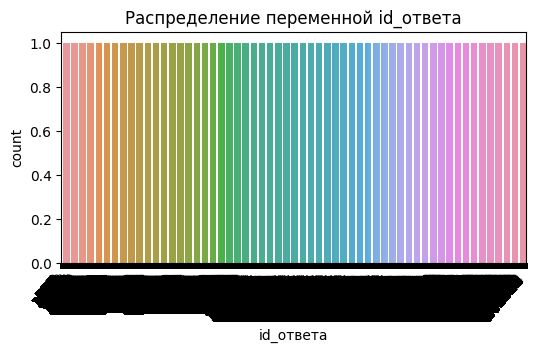

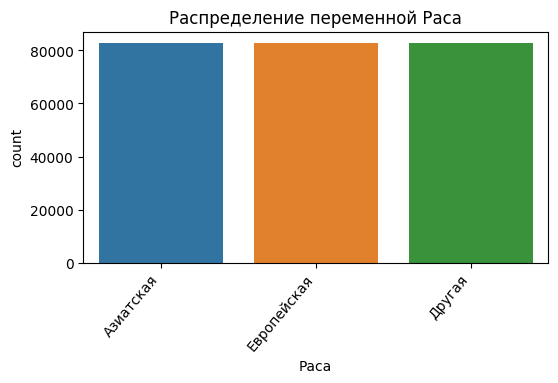

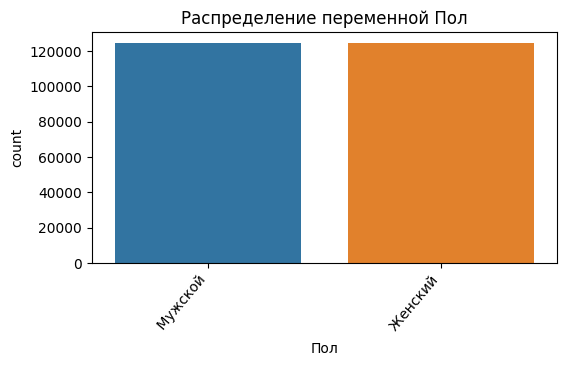

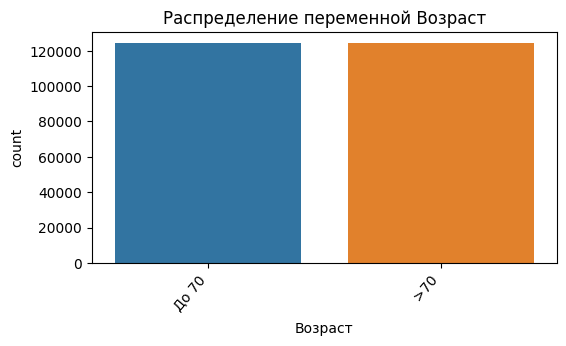

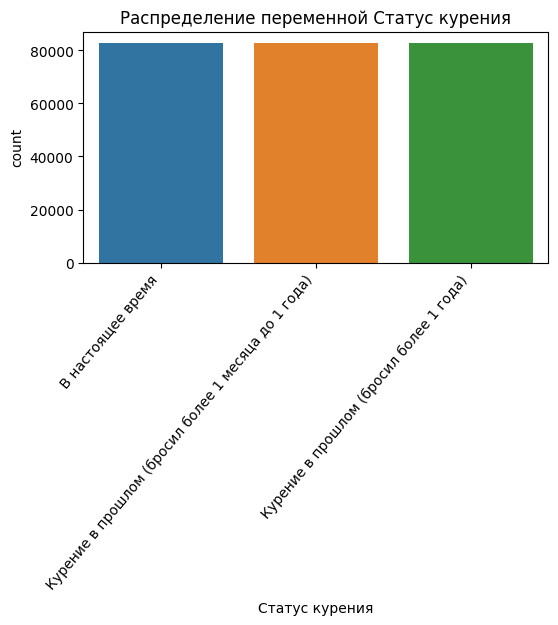

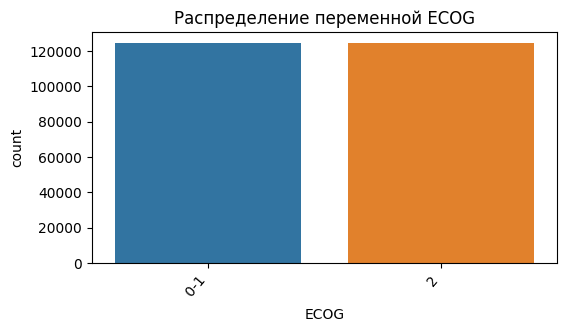

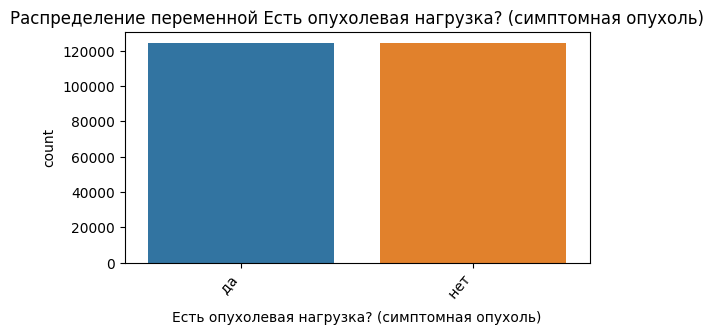

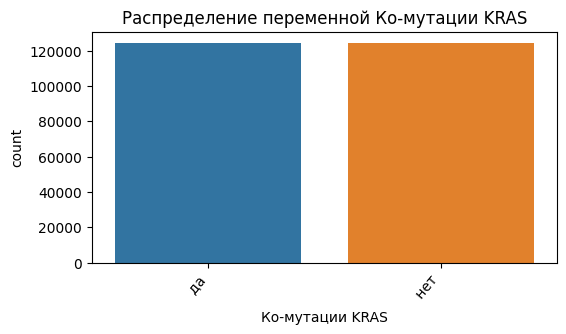

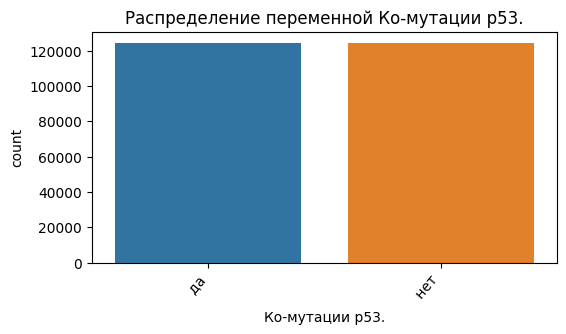

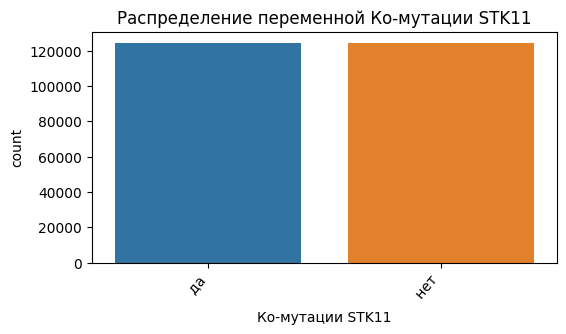

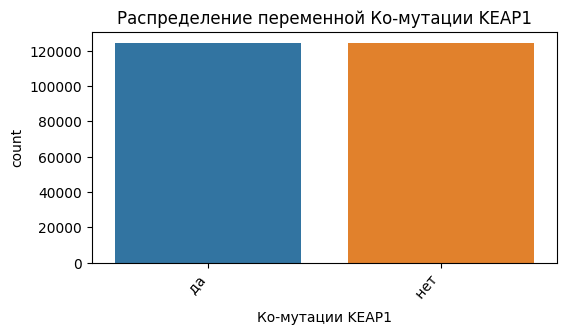

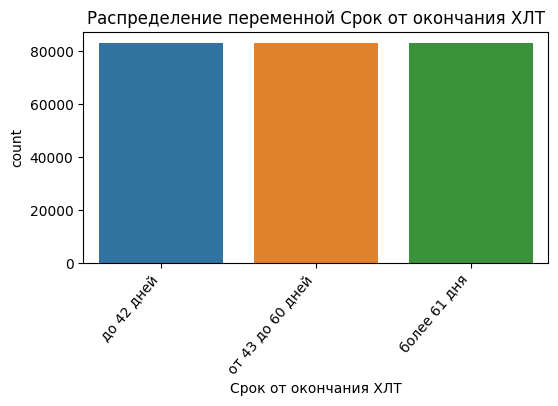

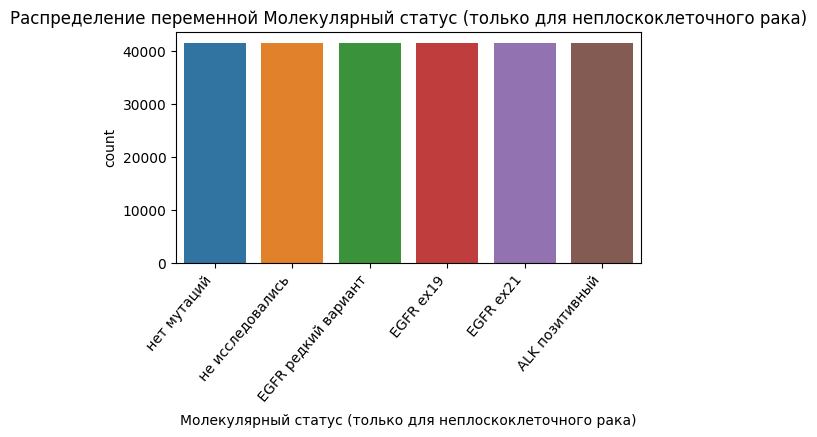

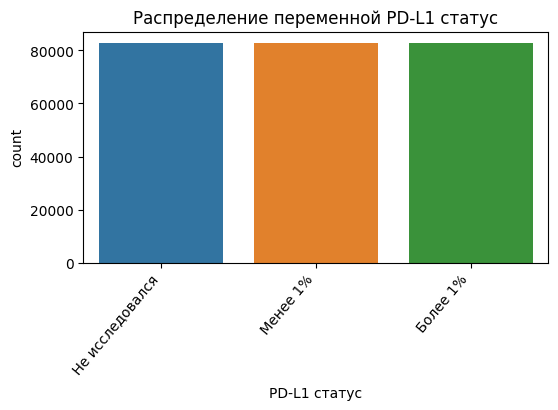

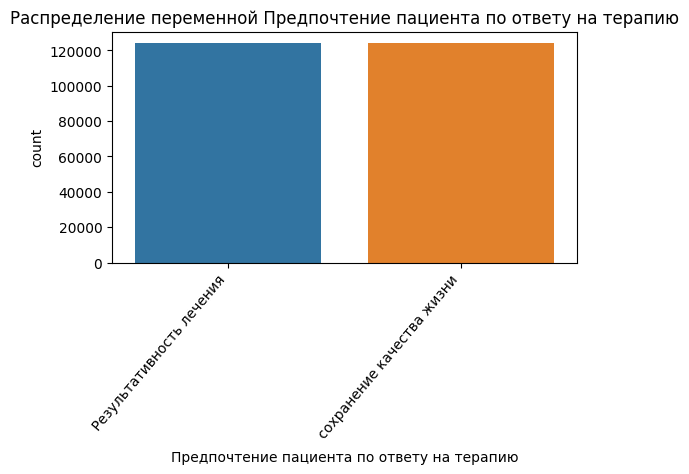

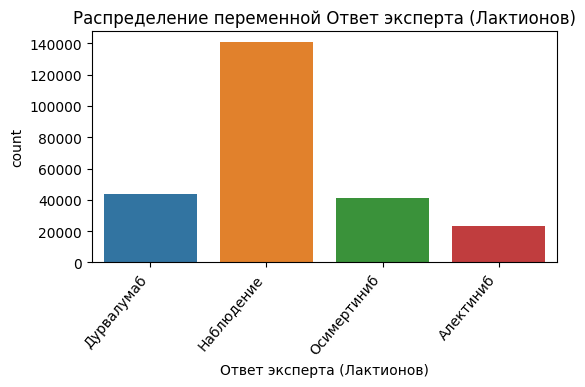

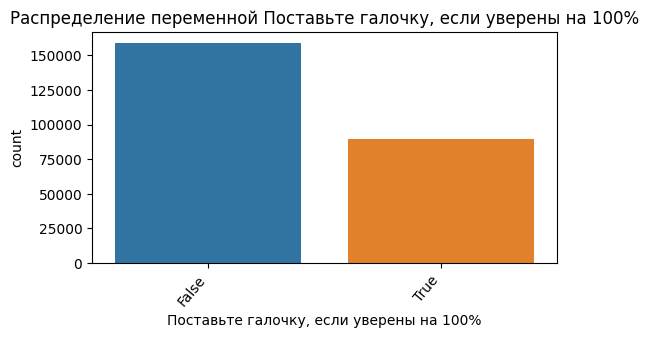

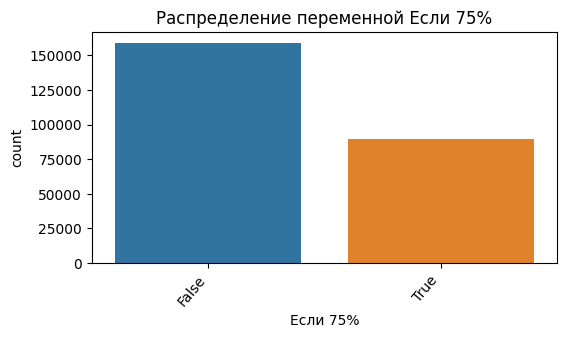

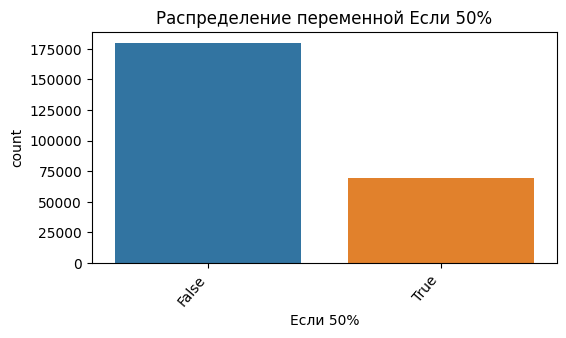

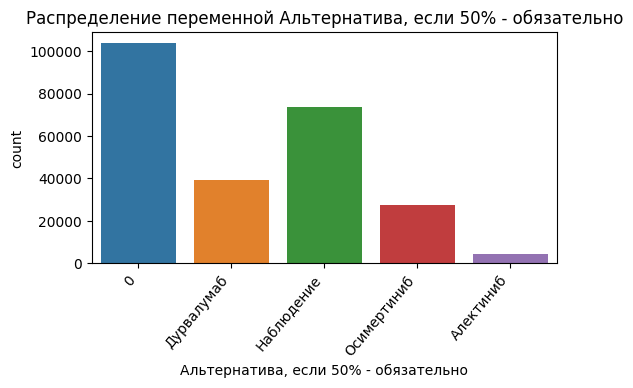

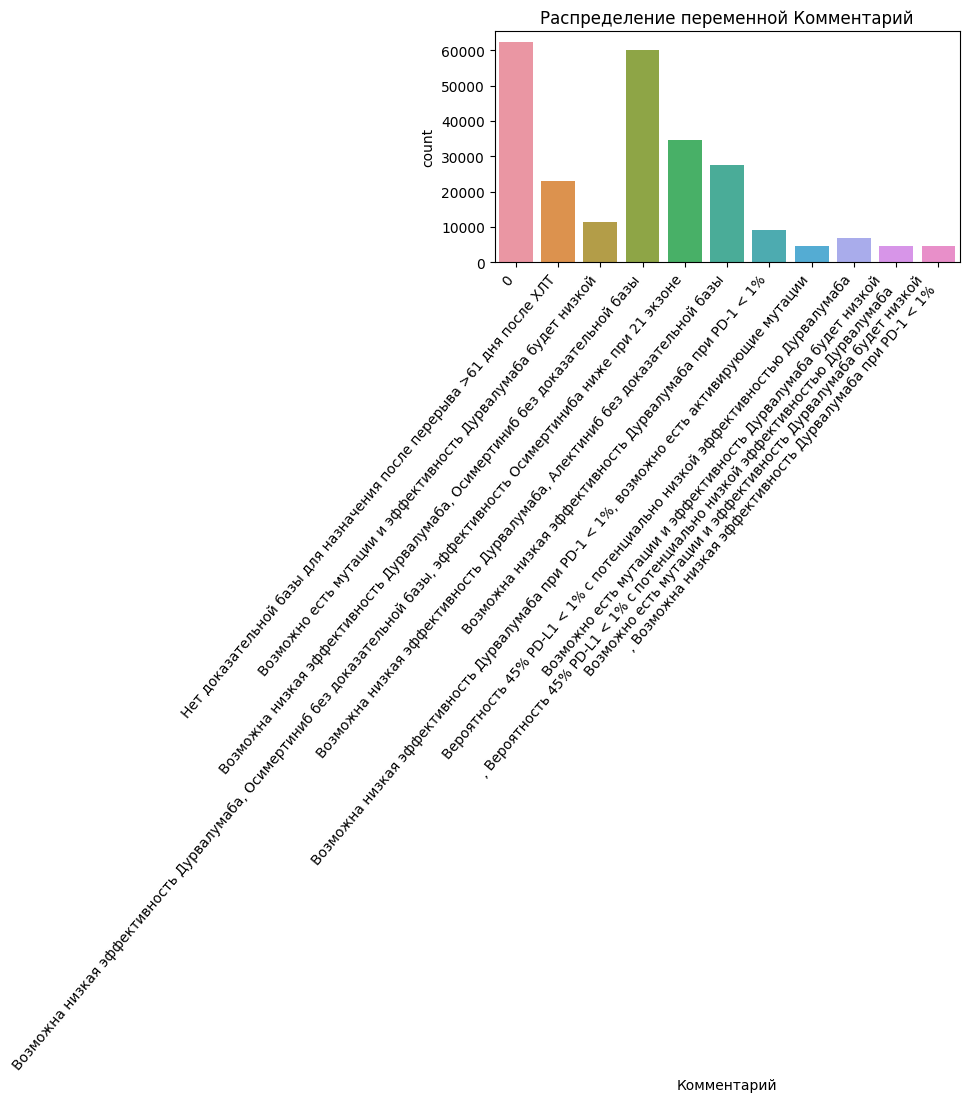

In [ ]:
# Определяем категориальные переменные
for column in db:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=column, data=db)
    plt.title(f'Распределение переменной {column}')
    plt.xticks(rotation=50, ha='right')
    plt.show()

#Матрица корреляции

In [10]:
db = db_raw.copy()
le = LabelEncoder()
# Далее запускаем нормаль
for col in db.columns:
    db[col] = le.fit_transform(db[col].astype(str))

db.fillna(0, inplace=True)
display(db.head())

,id_ответа,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,...,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов),"Поставьте галочку, если уверены на 100%",Если 75%,Если 50%,"Альтернатива, если 50% - обязательно",Комментарий
0,0,0,1,1,0,0,0,0,0,0,...,1,5,2,0,1,1,0,0,0,0
1,111111,0,1,1,0,0,0,0,0,0,...,2,5,2,0,1,1,0,0,0,0
2,171055,0,1,1,0,0,0,0,0,0,...,0,5,2,0,2,0,1,0,2,10
3,182166,0,1,1,0,0,0,0,0,0,...,1,4,2,0,1,0,1,0,0,7
4,193277,0,1,1,0,0,0,0,0,0,...,2,4,2,0,1,0,1,0,0,7


Количество строк для матрицы: 248832


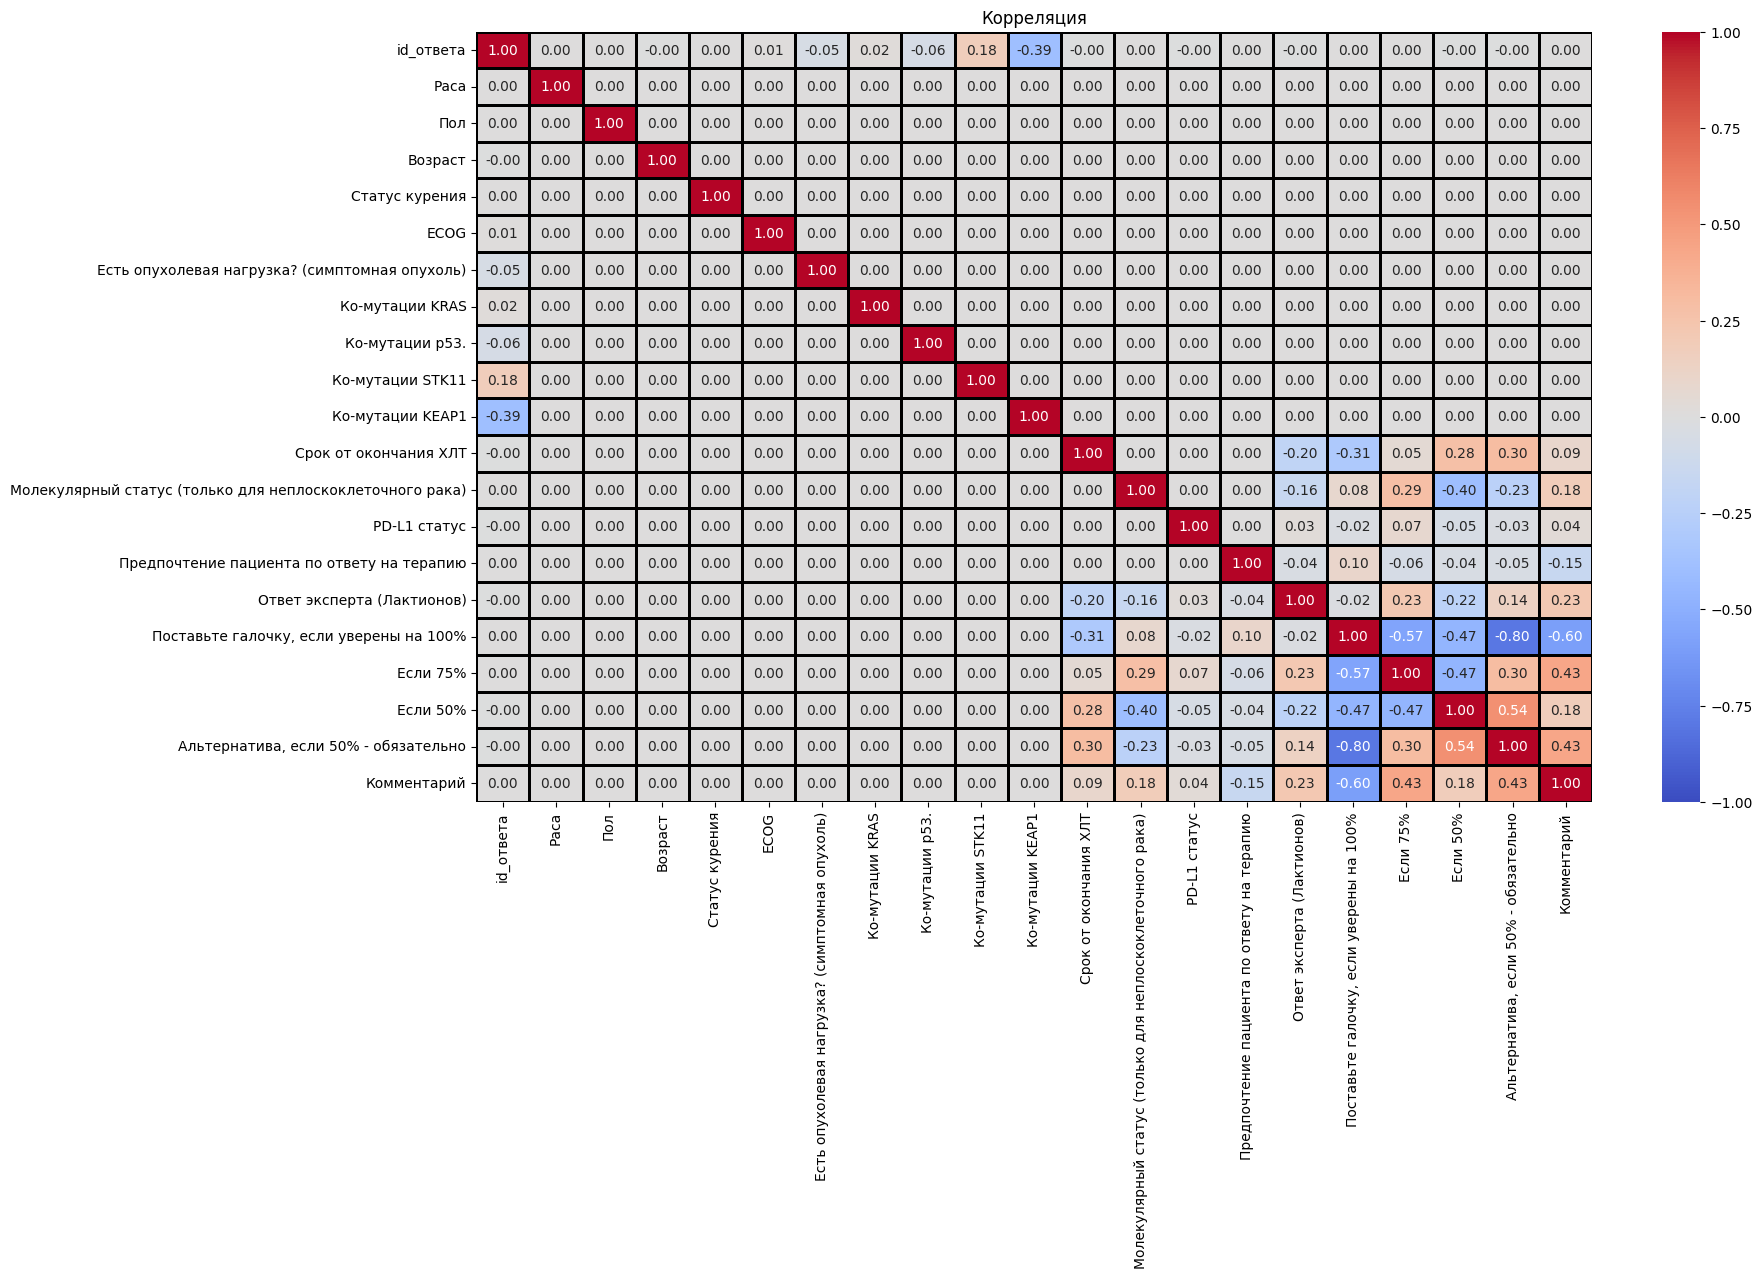

In [11]:
print('Количество строк для матрицы:',db.shape[0])
# Метод, подсчитывающий попарную корреляцию для элементов. Критерий спирмена
corr_matrix = db.corr('spearman')
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=1, linecolor='black', annot=True, fmt='.2f')
plt.title('Корреляция')
plt.show()